You are hired by one of the leading news channels CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

Dataset for Problem: Election_Data.xlsx

Data Ingestion: 11 marks

1.1 Read the dataset. Do the descriptive statistics and do the null value condition check. Write an inference on it. (4 Marks)

1.2 Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers. (7 Marks)

Data Preparation: 4 marks

1.3 Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test (70:30). (4 Marks)

Modeling: 22 marks

1.4 Apply Logistic Regression and LDA (linear discriminant analysis). (4 marks)

1.5 Apply KNN Model and Naïve Bayes Model. Interpret the results. (4 marks)

1.6 Model Tuning, Bagging (Random Forest should be applied for Bagging), and Boosting. (7 marks)

1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model. Final Model: Compare the models and write inference which model is best/optimized. (7 marks)


Inference: 5 marks

1.8 Based on these predictions, what are the insights? (5 marks)

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns


In [2]:
import matplotlib.pyplot as plt

In [3]:
df=pd.read_excel('Election_Data.xlsx',sheet_name=1,usecols=(1,2,3,4,5,6,7,8,9,10))

In [4]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [5]:
df[['national','household','pol_knowledge']]=df[['economic.cond.national','economic.cond.household','political.knowledge']]

In [6]:
df.drop(columns=['economic.cond.national','economic.cond.household','political.knowledge'],inplace=True)

In [7]:
df.describe()

,age,Blair,Hague,Europe,national,household,pol_knowledge
count,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000
mean,54.182295,3.334426,2.746885,6.728525,3.245902,3.140328,1.542295
std,15.711209,1.174824,1.230703,3.297538,0.880969,0.929951,1.083315
min,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,41.000000,2.000000,2.000000,4.000000,3.000000,3.000000,0.000000
50%,53.000000,4.000000,2.000000,6.000000,3.000000,3.000000,2.000000
75%,67.000000,4.000000,4.000000,10.000000,4.000000,4.000000,2.000000
max,93.000000,5.000000,5.000000,11.000000,5.000000,5.000000,3.000000


In [8]:
df.isnull().sum()

vote             0
age              0
Blair            0
Hague            0
Europe           0
gender           0
national         0
household        0
pol_knowledge    0
dtype: int64

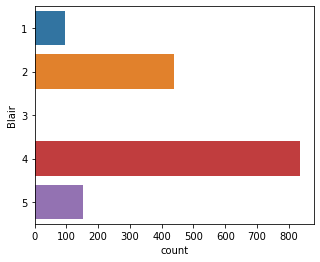

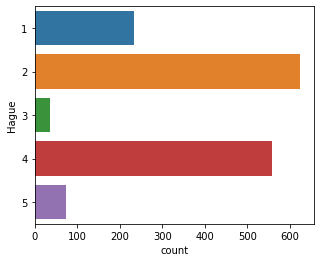

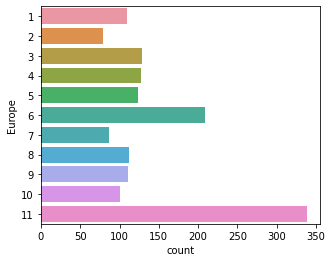

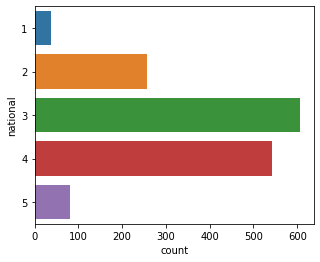

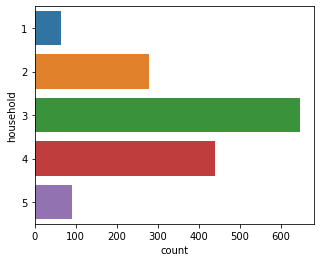

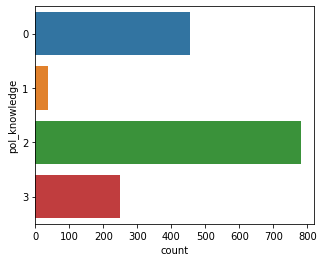

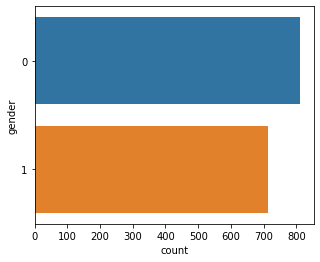

In [93]:
for col in ['Blair', 'Hague', 'Europe', 'national', 'household', 'pol_knowledge','gender']:

    plt.figure(figsize=(5,4))
    sns.countplot(y=df[col]);
    plt.show()

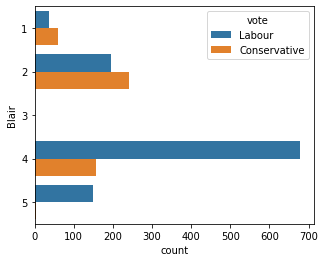

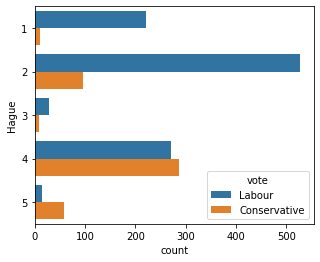

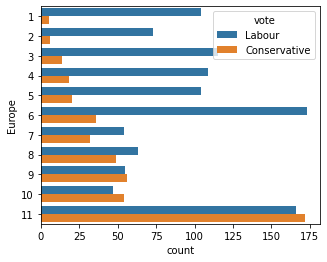

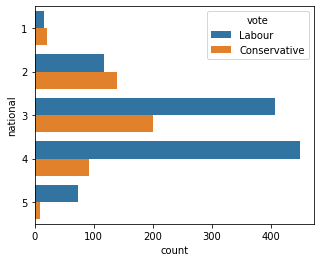

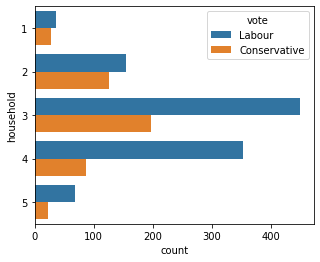

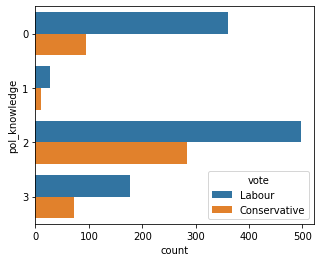

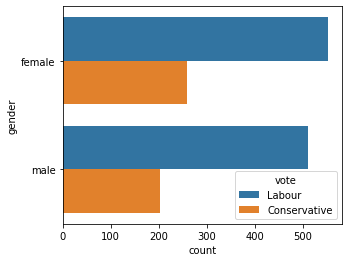

In [11]:
for col in ['Blair', 'Hague', 'Europe', 'national', 'household', 'pol_knowledge','gender']:

    plt.figure(figsize=(5,4))
    sns.countplot(y=df[col],hue=df['vote']);
    plt.show()

-

The data consists of 1525 rows X 9 columns and there are no null values present.


-


<AxesSubplot:>

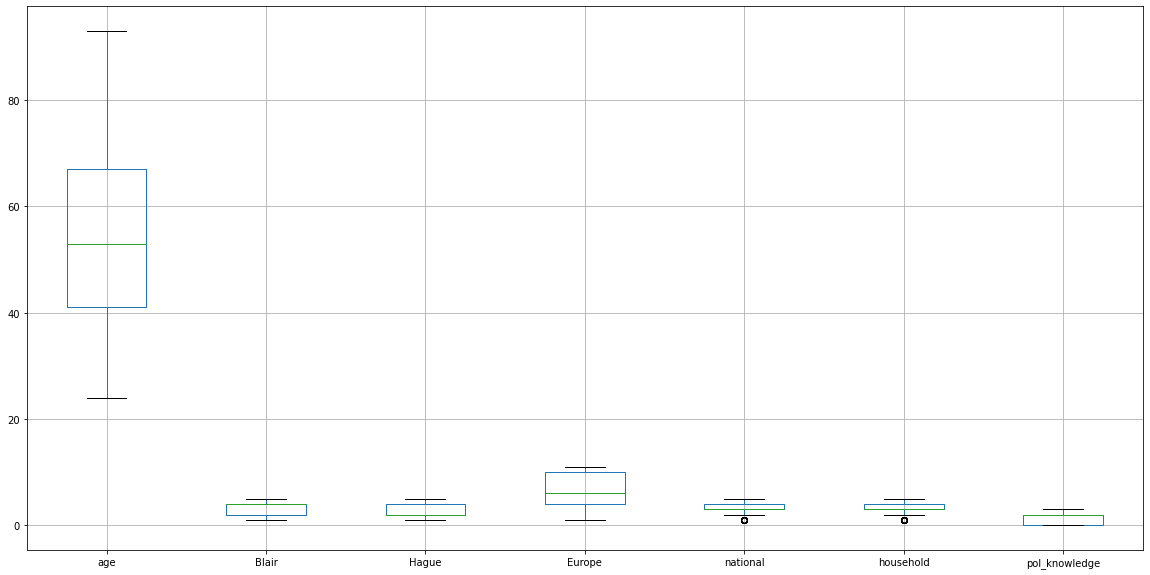

In [13]:
plt.figure(figsize=(20,10))
df.boxplot()

In [14]:
cols=[c for c in df.columns if df[c].dtype!='object']
cols

['age', 'Blair', 'Hague', 'Europe', 'national', 'household', 'pol_knowledge']

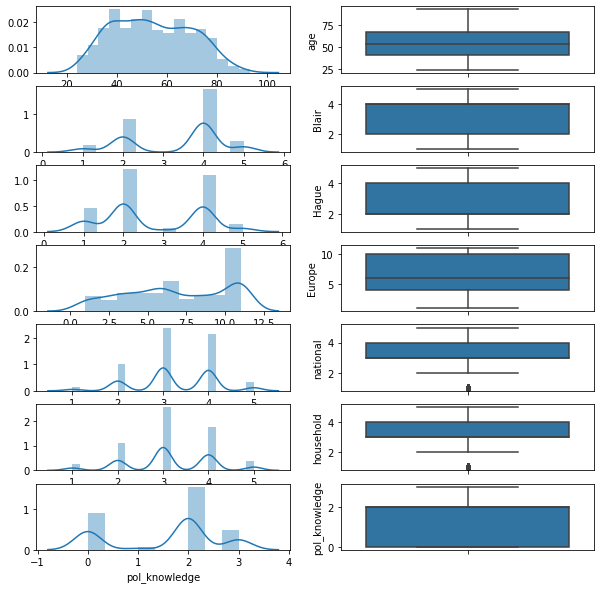

In [18]:
#plt.style.use('ggplot')
fig, axes = plt.subplots(nrows=7,ncols=2)
fig.set_size_inches(10,10)
i=0
j=0
for col in cols:
    a = sns.distplot(df[col] , ax=axes[i][j])
    #a.set_title(col,fontsize=10)
    j+=1
    a = sns.boxplot(df[col] , orient = "v" , ax=axes[i][j])
    #a.set_title(col,fontsize=10)

    i+=1
    j=0
plt.show()   

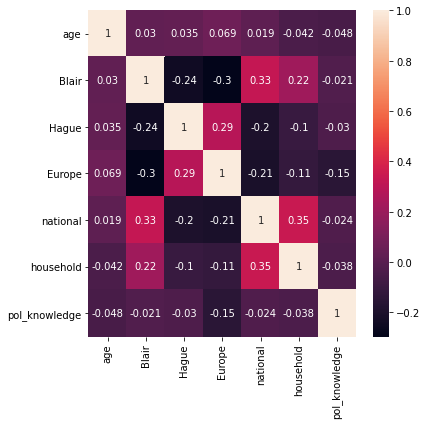

In [19]:
plt.figure(figsize=(6,6))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [14]:
sns.set(style="white", context="talk")

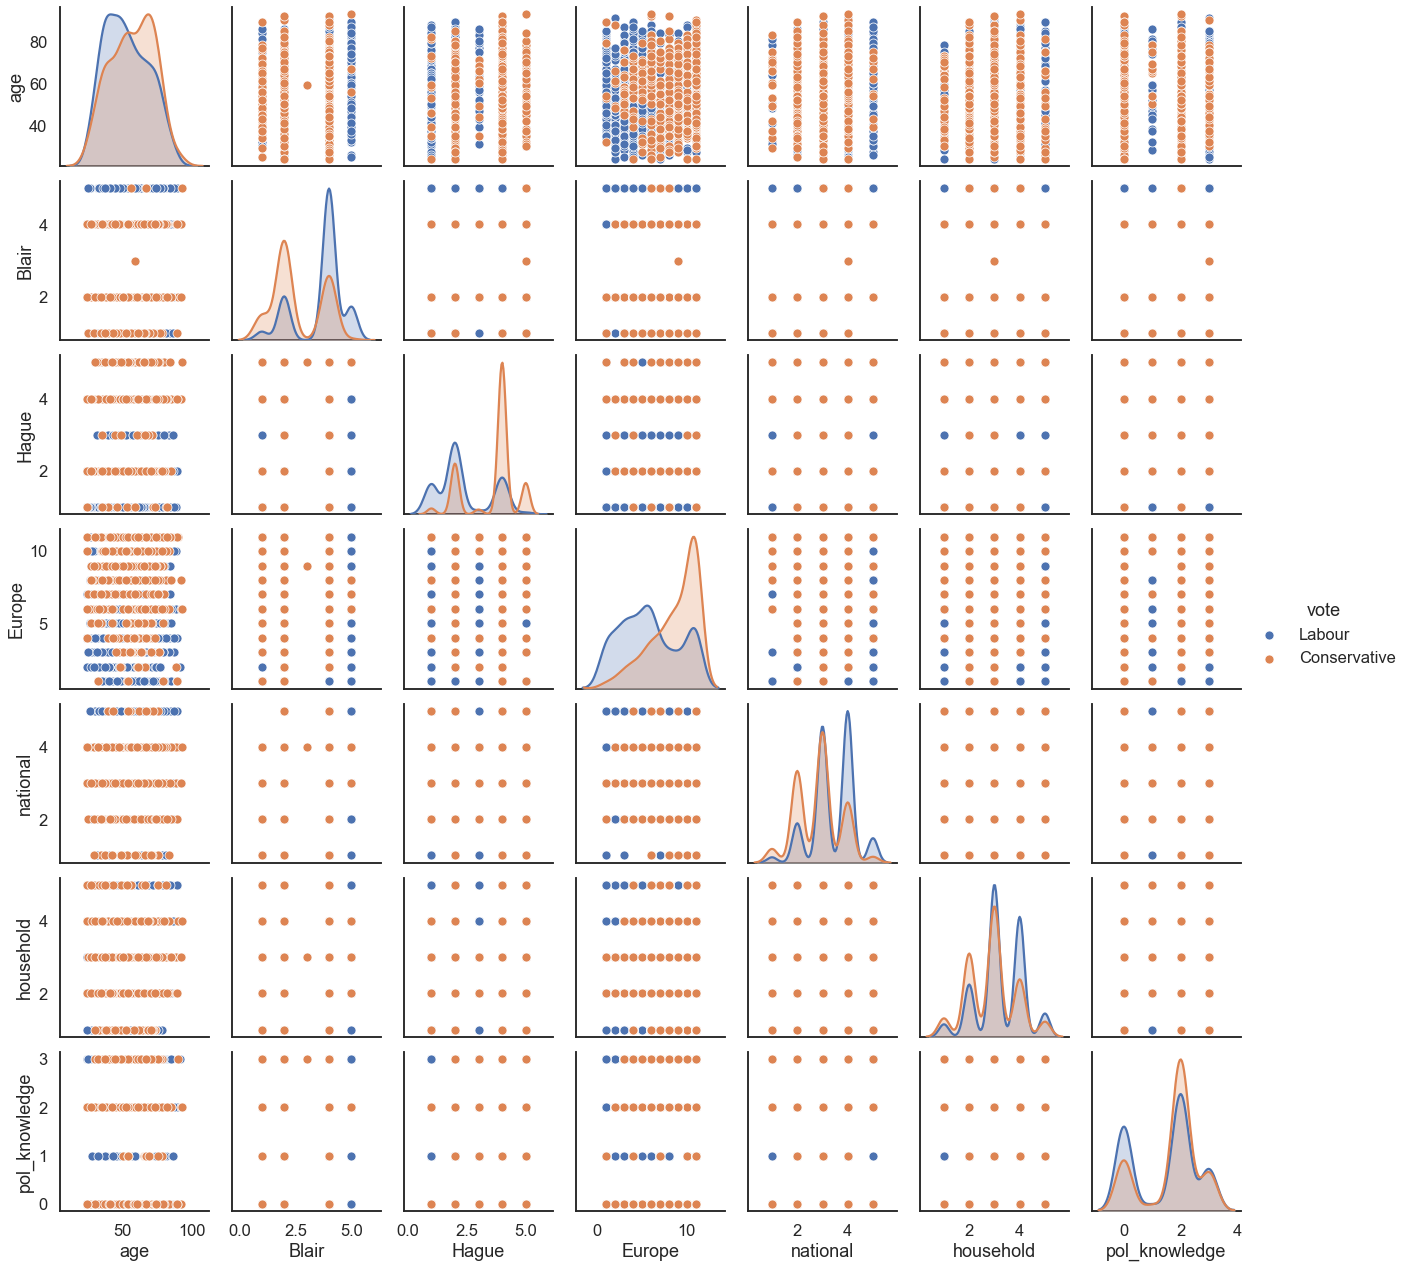

In [15]:
sns.pairplot(df,diag_kind = 'kde',hue='vote')

In [20]:
df.dtypes

vote             object
age               int64
Blair             int64
Hague             int64
Europe            int64
gender           object
national          int64
household         int64
pol_knowledge     int64
dtype: object

Data Preparation: 4 marks

1.3 Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test (70:30). (4 Marks)

In [21]:
for feature in df.columns: 
    if df[feature].dtype == 'object':
        df[feature] = pd.Categorical(df[feature]).codes

In [22]:
df.head()

,vote,age,Blair,Hague,Europe,gender,national,household,pol_knowledge
0,1,43,4,1,2,0,3,3,2
1,1,36,4,4,5,1,4,4,2
2,1,35,5,2,3,1,4,4,2
3,1,24,2,1,4,0,4,2,0
4,1,41,1,1,6,1,2,2,2


In [29]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt   
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

In [24]:
Y = df.pop('vote')
X = df

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [26]:
from sklearn.model_selection import GridSearchCV

grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"],'max_iter':[1000,10000],'n_jobs':[2,3]}

model=LogisticRegression()
model=GridSearchCV(model,grid,cv=10)
model.fit(X_train,y_train)

y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print(model_score)
print("tuned hpyerparameters :(best parameters) ",model.best_params_)
print("accuracy :",model.best_score_)

C:\Users\rites\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rites\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rites\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\rites\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-tes

C:\Users\rites\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rites\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rites\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\rites\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-tes

C:\Users\rites\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rites\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rites\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\rites\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-tes

C:\Users\rites\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rites\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rites\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\rites\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-tes

0.8493449781659389
tuned hpyerparameters :(best parameters)  {'C': 0.01, 'max_iter': 1000, 'n_jobs': 2, 'penalty': 'l2'}
accuracy : 0.821010403808852


In [33]:
model=LogisticRegression(C=0.01,penalty="l2",max_iter= 1000, n_jobs= 2)
model.fit(X_train,y_train)
print("score",model.score(X_test,y_test))

score 0.8493449781659389


              precision    recall  f1-score   support

           0       0.81      0.68      0.74       144
           1       0.86      0.93      0.89       314

    accuracy                           0.85       458
   macro avg       0.84      0.80      0.82       458
weighted avg       0.85      0.85      0.85       458
 



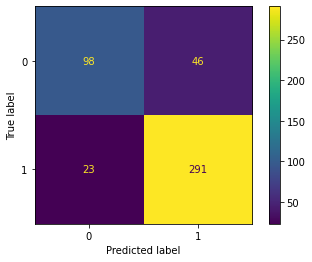

In [35]:
#print(metrics.confusion_matrix(y_test, y_predict))
#print(metrics.classification_report(y_test, y_predict))
plot_confusion_matrix(model,X_test,y_test)
print(classification_report(y_test, y_predict),'\n');

AUC: 0.900


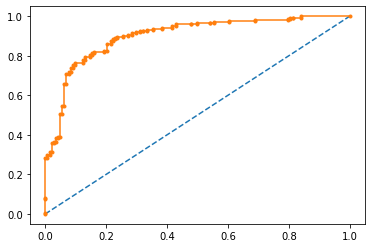

In [36]:
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [37]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix

In [57]:
grid={'solver':['svd','lsqr','eigen'],
    'tol':[0.0001,0.001]}
clf = LinearDiscriminantAnalysis()
clf=GridSearchCV(clf,grid,cv=10)
model=clf.fit(X_train,y_train)
model

GridSearchCV(cv=10, estimator=LinearDiscriminantAnalysis(),
             param_grid={'solver': ['svd', 'lsqr', 'eigen'],
                         'tol': [0.0001, 0.001]})

In [58]:
print("tuned hpyerparameters :(best parameters) ",model.best_params_)
print("accuracy :",model.best_score_)

tuned hpyerparameters :(best parameters)  {'solver': 'svd', 'tol': 0.0001}
accuracy : 0.8238141421266091


In [59]:
clf = LinearDiscriminantAnalysis(solver= 'svd', tol=0.0001)
model=clf.fit(X_train,y_train)
model
model_score = model.score(X_train,y_train)
print(model_score)


0.8256794751640113


In [61]:
pred_class = model.predict(X_test)
#df['Prediction'] = pred_class 


In [63]:
confusion_matrix(y_test, pred_class)

array([[105,  39],
       [ 30, 284]], dtype=int64)

              precision    recall  f1-score   support

           0       0.78      0.73      0.75       144
           1       0.88      0.90      0.89       314

    accuracy                           0.85       458
   macro avg       0.83      0.82      0.82       458
weighted avg       0.85      0.85      0.85       458
 



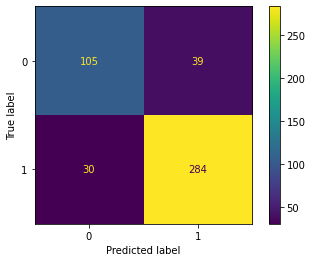

In [68]:
plot_confusion_matrix(model,X_test,y_test)
print(classification_report(y_test, pred_class),'\n');

AUC: 0.900


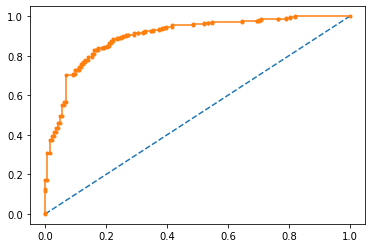

In [69]:
probs = model.predict_proba(X_test)
probs = probs[:, 1]

auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)

fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(fpr, tpr, marker='.')

plt.show()

1.5 Apply KNN Model and Naïve Bayes Model. Interpret the results. (4 marks)

In [70]:
from sklearn.neighbors import KNeighborsClassifier

In [71]:
grid={'n_neighbors': [5,10,15,20] , 'weights' : ['distance']}
NNH = KNeighborsClassifier( )
NNH=GridSearchCV(NNH,grid,cv=10)
NNH.fit(X_train, y_train)

print("tuned hpyerparameters :(best parameters) ",NNH.best_params_)
print("accuracy :",NNH.best_score_)


tuned hpyerparameters :(best parameters)  {'n_neighbors': 20, 'weights': 'distance'}
accuracy : 0.7965879033680128


In [72]:
predicted_labels = NNH.predict(X_test)
NNH.score(X_test, y_test)

0.8275109170305677

In [77]:
confusion_matrix(y_test, predicted_labels)

array([[ 92,  52],
       [ 27, 287]], dtype=int64)

              precision    recall  f1-score   support

           0       0.77      0.64      0.70       144
           1       0.85      0.91      0.88       314

    accuracy                           0.83       458
   macro avg       0.81      0.78      0.79       458
weighted avg       0.82      0.83      0.82       458
 



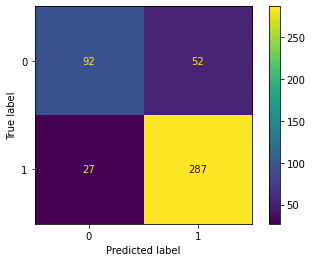

In [76]:
## Confusion matrix on the training data

plot_confusion_matrix(NNH,X_test,y_test)
print(classification_report(y_test, predicted_labels),'\n');

AUC: 0.890


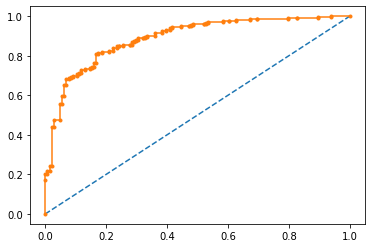

In [78]:
probs = NNH.predict_proba(X_test)
probs = probs[:, 1]

auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)

fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(fpr, tpr, marker='.')

plt.show()

In [79]:
from sklearn.naive_bayes import GaussianNB
diab_model = GaussianNB()

diab_model.fit(X_train, y_train.ravel())

GaussianNB()

In [80]:
diab_test_predict = diab_model.predict(X_test)

from sklearn import metrics

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, diab_test_predict)))
print()

Model Accuracy: 0.8450



              precision    recall  f1-score   support

           0       0.75      0.76      0.75       144
           1       0.89      0.89      0.89       314

    accuracy                           0.84       458
   macro avg       0.82      0.82      0.82       458
weighted avg       0.85      0.84      0.85       458
 



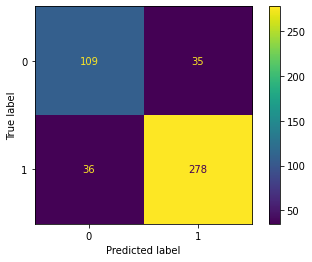

In [84]:
## Confusion matrix on the training data

plot_confusion_matrix(diab_model,X_test,y_test)
print(classification_report(y_test, diab_test_predict),'\n');

AUC: 0.899


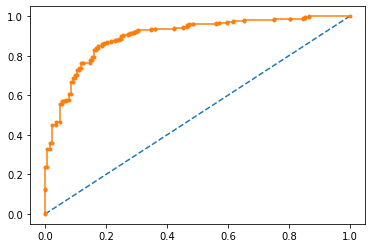

In [85]:
probs = diab_model.predict_proba(X_test)
probs = probs[:, 1]

auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)

fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(fpr, tpr, marker='.')

plt.show()

1.6 Model Tuning, Bagging (Random Forest should be applied for Bagging), and Boosting. (7 marks)

In [86]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier


In [99]:
rf=RandomForestClassifier()
Bagging_model=BaggingClassifier(base_estimator=rf,n_estimators=100,random_state=1)
Bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=100,
                  random_state=1)

In [100]:
ytrain_predict_bg = Bagging_model.predict(X_train)
ytest_predict_bg = Bagging_model.predict(X_test)

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       318
           1       0.97      0.99      0.98       749

    accuracy                           0.97      1067
   macro avg       0.98      0.96      0.97      1067
weighted avg       0.97      0.97      0.97      1067
 



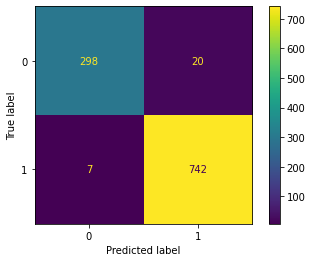

In [101]:
## Confusion matrix on the training data

plot_confusion_matrix(Bagging_model,X_train,y_train)
print(classification_report(y_train, ytrain_predict_bg),'\n');

              precision    recall  f1-score   support

           0       0.77      0.67      0.72       144
           1       0.86      0.91      0.88       314

    accuracy                           0.83       458
   macro avg       0.81      0.79      0.80       458
weighted avg       0.83      0.83      0.83       458
 



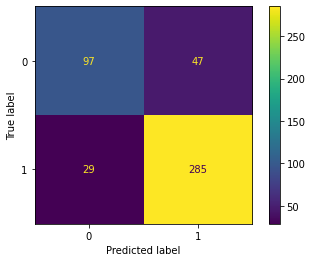

In [102]:
plot_confusion_matrix(Bagging_model,X_test,y_test)
print(classification_report(y_test, ytest_predict_bg),'\n');

AUC: 0.891


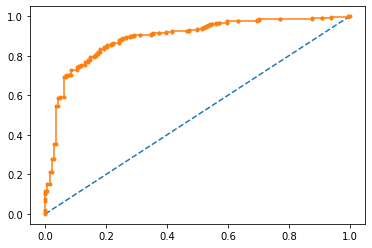

In [104]:
probs = Bagging_model.predict_proba(X_test)
probs = probs[:, 1]

auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)

fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(fpr, tpr, marker='.')

plt.show()

In [94]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(random_state=1)
gbcl = gbcl.fit(X_train, y_train)

In [95]:
## Performance Matrix on train data set
y_train_predict = gbcl.predict(X_train)
model_score = gbcl.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8940955951265229
[[248  70]
 [ 43 706]]
              precision    recall  f1-score   support

           0       0.85      0.78      0.81       318
           1       0.91      0.94      0.93       749

    accuracy                           0.89      1067
   macro avg       0.88      0.86      0.87      1067
weighted avg       0.89      0.89      0.89      1067



In [96]:
## Performance Matrix on test data set
y_test_predict = gbcl.predict(X_test)
model_score = gbcl.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8318777292576419
[[ 97  47]
 [ 30 284]]
              precision    recall  f1-score   support

           0       0.76      0.67      0.72       144
           1       0.86      0.90      0.88       314

    accuracy                           0.83       458
   macro avg       0.81      0.79      0.80       458
weighted avg       0.83      0.83      0.83       458



              precision    recall  f1-score   support

           0       0.76      0.67      0.72       144
           1       0.86      0.90      0.88       314

    accuracy                           0.83       458
   macro avg       0.81      0.79      0.80       458
weighted avg       0.83      0.83      0.83       458
 



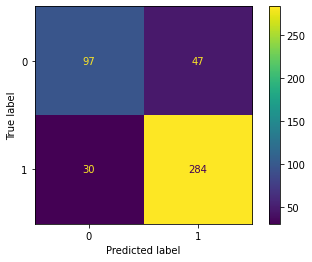

In [97]:
plot_confusion_matrix(gbcl,X_test,y_test)
print(classification_report(y_test, y_test_predict),'\n');

AUC: 0.896


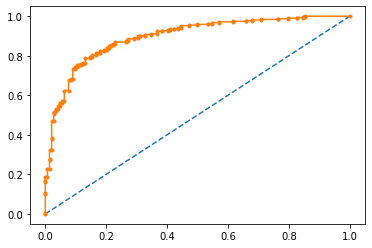

In [98]:
probs = gbcl.predict_proba(X_test)
probs = probs[:, 1]

auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)

fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(fpr, tpr, marker='.')

plt.show()

1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model. Final Model: Compare the models and write inference which model is best/optimized. (7 marks)

# 2

In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:

President Franklin D. Roosevelt in 1941
President John F. Kennedy in 1961
President Richard Nixon in 1973
(Hint: use .words(), .raw(), .sent() for extracting counts)

2.1 Find the number of characters, words, and sentences for the mentioned documents. – 3 Marks

2.2 Remove all the stopwords from all three speeches. – 3 Marks

2.3 Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords) – 3 Marks

2.4 Plot the word cloud of each of the speeches of the variable. (after removing the stopwords) – 3 Marks [ refer to the End-to-End Case Study done in the Mentored Learning Session ]


In [50]:
import nltk
nltk.download('inaugural')
from nltk.corpus import inaugural
import re
inaugural.fileids()

rose=inaugural.raw('1941-Roosevelt.txt')
kenn=inaugural.raw('1961-Kennedy.txt')
nix=inaugural.raw('1973-Nixon.txt')


[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\rites\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


In [51]:
sp=[rose,kenn,nix]

In [52]:
df = pd.DataFrame(sp, index =['R', 'K', 'N',],columns =['speech'])
df

,speech
R,On each national day of inauguration since 178...
K,"Vice President Johnson, Mr. Speaker, Mr. Chief..."
N,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus..."


2.1 Find the number of characters, words, and sentences for the mentioned documents. – 3 Marks

In [53]:
print('Characters in Roosevelt :',len(inaugural.raw('1941-Roosevelt.txt')))
print('Words in Roosevelt :',len(inaugural.words(fileids=['1941-Roosevelt.txt'])))
print('Sentences in Roosevelt :',len(inaugural.sents(fileids='1941-Roosevelt.txt')))
print('Characters in Kennedy :',len(inaugural.raw('1961-Kennedy.txt')))
print('Words in Kennedy :',len(inaugural.words(fileids=['1961-Kennedy.txt'])))
print('Sentences in Kennedy :',len(inaugural.sents(fileids='1961-Kennedy.txt')))
print('Characters in Nixon :',len(inaugural.raw('1973-Nixon.txt')))
print('Words in Nixon :',len(inaugural.words(fileids=['1973-Nixon.txt'])))
print('Sentences in Nixon :',len(inaugural.sents(fileids='1973-Nixon.txt')))

Characters in Roosevelt : 7571
Words in Roosevelt : 1536
Sentences in Roosevelt : 68
Characters in Kennedy : 7618
Words in Kennedy : 1546
Sentences in Kennedy : 52
Characters in Nixon : 9991
Words in Nixon : 2028
Sentences in Nixon : 69


2.2 Remove all the stopwords from all three speeches. – 3 Marks

In [54]:
from nltk.corpus import stopwords
nltk.download('stopwords')
import string
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rites\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [55]:
stopwords = nltk.corpus.stopwords.words('english') +list(string.punctuation)+['--','.',',','-',' -- ']+list(STOPWORDS)

In [56]:
all_words = (w.lower() for w in  inaugural.words(['1941-Roosevelt.txt','1961-Kennedy.txt','1973-Nixon.txt']))
all_words_clean = [word for word in all_words if word not in stopwords]

In [57]:
print('After removing stop words :',len(all_words_clean))

After removing stop words : 2126


In [58]:
all_words_freq = nltk.FreqDist(all_words_clean)

inaugural_1= [item[0] for item in all_words_freq.most_common()]


In [59]:
print('Most common words :',len(inaugural_1))

Most common words : 1019


In [60]:
#To check above answer
unique=[]
for i in all_words_clean:
    
    if i in unique:
        pass
    else:
        unique.append(i)
len(unique)

1019

2.3 Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords) – 3 Marks

In [61]:
for pres in ['1941-Roosevelt.txt','1961-Kennedy.txt','1973-Nixon.txt']:
    all_words = (w.lower() for w in  inaugural.words(pres))
    all_words = [word for word in all_words if word not in stopwords]
    all_words = nltk.FreqDist(all_words)
    #print(all_words.most_common()[0:5])

    inaugural_1= [item[0] for item in all_words.most_common(3)]
    
    print('3 most common words in', pres,' : ',inaugural_1)

3 most common words in 1941-Roosevelt.txt  :  ['nation', 'know', 'spirit']
3 most common words in 1961-Kennedy.txt  :  ['let', 'us', 'world']
3 most common words in 1973-Nixon.txt  :  ['us', 'let', 'america']


In [62]:
from nltk.stem.snowball import SnowballStemmer

In [63]:
def myTokenizer(text):
    temp_tokens = [word for word in nltk.word_tokenize(text)]
    tokens = []
    for token in temp_tokens:
        if re.search('[a-zA-Z]', token):
            tokens.append(token)
    ret_tokens = [stemmer.stem(t) for t in tokens]
    return ret_tokens



In [64]:
stemmer = SnowballStemmer("english")


2.4 Plot the word cloud of each of the speeches of the variable. (after removing the stopwords) – 3 Marks

3 most common words in 1941-Roosevelt.txt  :  ['nation', 'know', 'peopl']
*******************CLOUD FOR  1941-Roosevelt.txt *************************


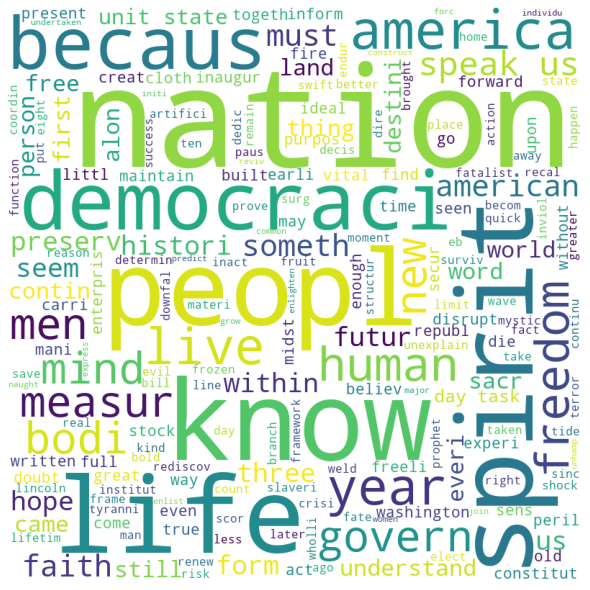

3 most common words in 1961-Kennedy.txt  :  ['let', 'us', 'power']
*******************CLOUD FOR  1961-Kennedy.txt *************************


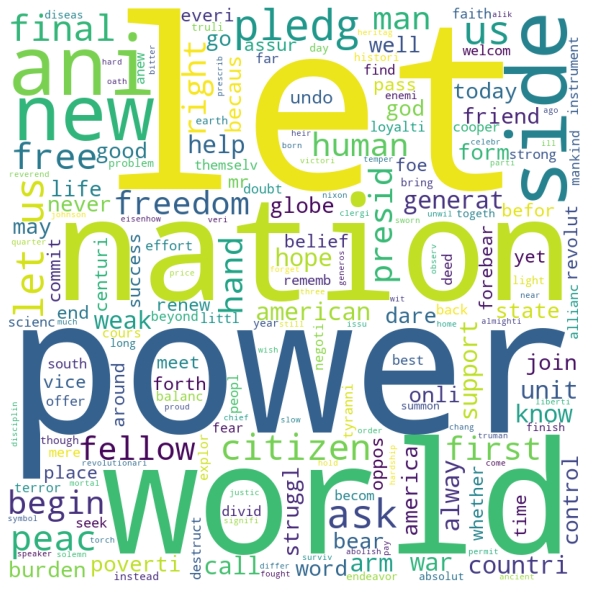

3 most common words in 1973-Nixon.txt  :  ['us', 'let', 'america']
*******************CLOUD FOR  1973-Nixon.txt *************************


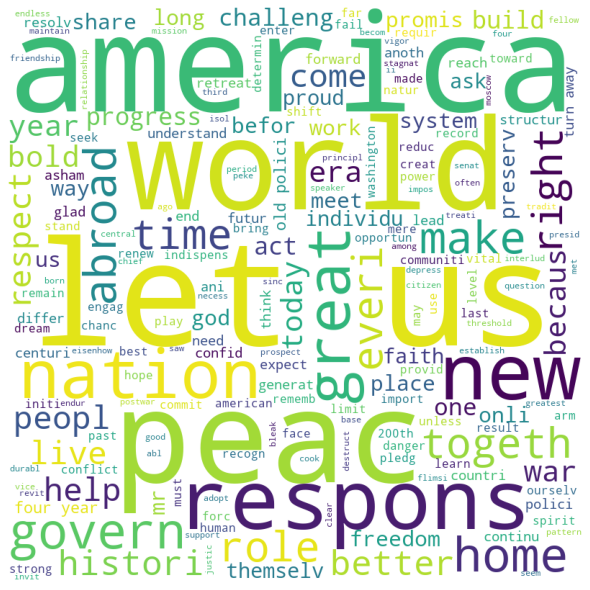

In [71]:
for pres in ['1941-Roosevelt.txt','1961-Kennedy.txt','1973-Nixon.txt']:
    cw=myTokenizer(inaugural.raw(pres))
    all_words = (w.lower() for w in cw )
    all_words = [word for word in all_words if word not in stopwords]
    #print(all_words)
    #all_words=myTokenizer(all_words)
    all_words_ = nltk.FreqDist(all_words)
    inaugural_1= [item[0] for item in all_words_.most_common(3)]
    
    print('3 most common words in', pres,' : ',inaugural_1)
    comment_words = ''
    for val in all_words:

        
        val = str(val)

        
        tokens = val.split()

        
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()

        comment_words += " ".join(tokens)+" "
        #print(comment_words)

    
    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',stopwords=stopwords,
                    min_font_size = 10).generate(comment_words)
    

    # plot the WordCloud image                       
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    print('*******************CLOUD FOR ',pres,'*************************')
    plt.show()